<a href="https://colab.research.google.com/github/SanjanaHukkeri/NAM_Group/blob/main/GoT_Season5_NAMAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important Libraries

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import random
import matplotlib.patches as mpatches
from itertools import count

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


Mounting drive and Importing datasets

In [ ]:
drive.mount("drive")
path = "/content/drive/MyDrive/NAM/"
edgeDF = pd.read_csv(f"{path}got-s5-edges.csv")
nodeDF = pd.read_csv(f"{path}got-s5-nodes.csv")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
len(edgeDF.Target.unique())

101

Charecter graph 

In [ ]:
G = nx.from_pandas_edgelist(edgeDF, 'Source', 'Target',['Weight'])

In [ ]:
g1 = nx.Graph()
degeDF = edgeDF.reset_index()
for index, row in edgeDF.iterrows():
  g1.add_edge(row.Source, row.Target, weight = row.Weight)

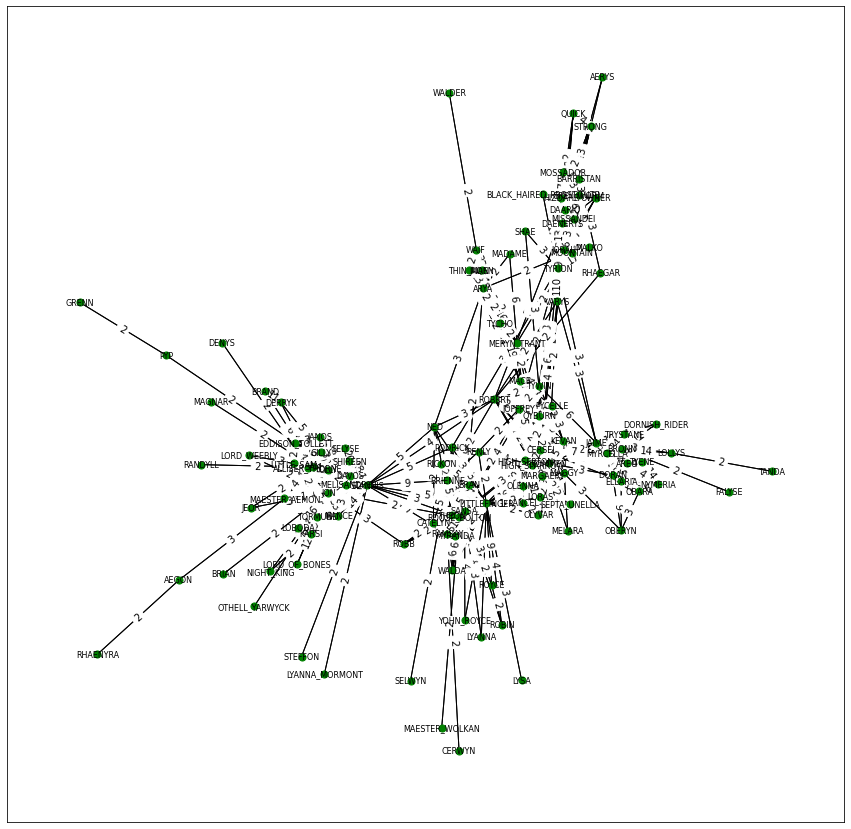

In [ ]:
plt.figure(3, figsize = (15, 15))
pos = nx.fruchterman_reingold_layout(g1)

nx.draw_networkx(g1, pos = pos, node_size = 50, font_size = 8, node_color = "green")
nx.draw_networkx_edges(g1, pos = pos)
edge_labels = nx.get_edge_attributes(g1, 'weight')
nx.draw_networkx_edge_labels(g1, pos = pos, edge_labels = edge_labels)
plt.show()

In [ ]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes =",str(n))
print("Number of edges =", str(m))
print("Number of connected components =", str(nx.number_connected_components(G)))

Number of nodes = 119
Number of edges = 396
Number of connected components = 1


Degree Distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


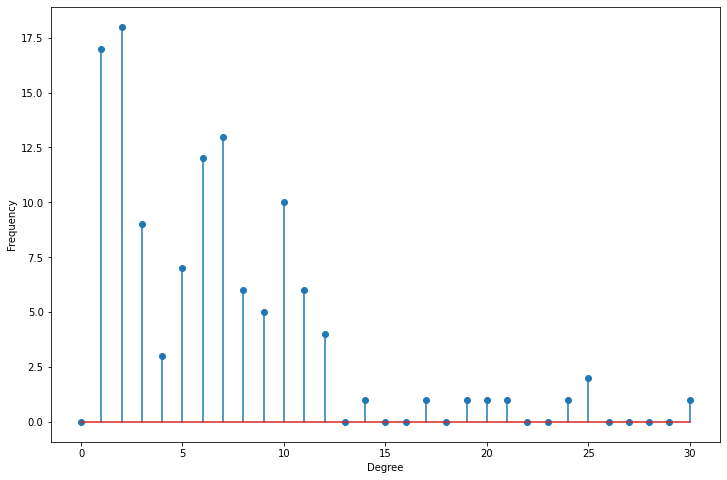

In [ ]:
deg_freq = np.array(nx.degree_histogram(G)).astype('float')
plt.figure(figsize = (12, 8))
plt.stem(deg_freq)
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()


Community Detection

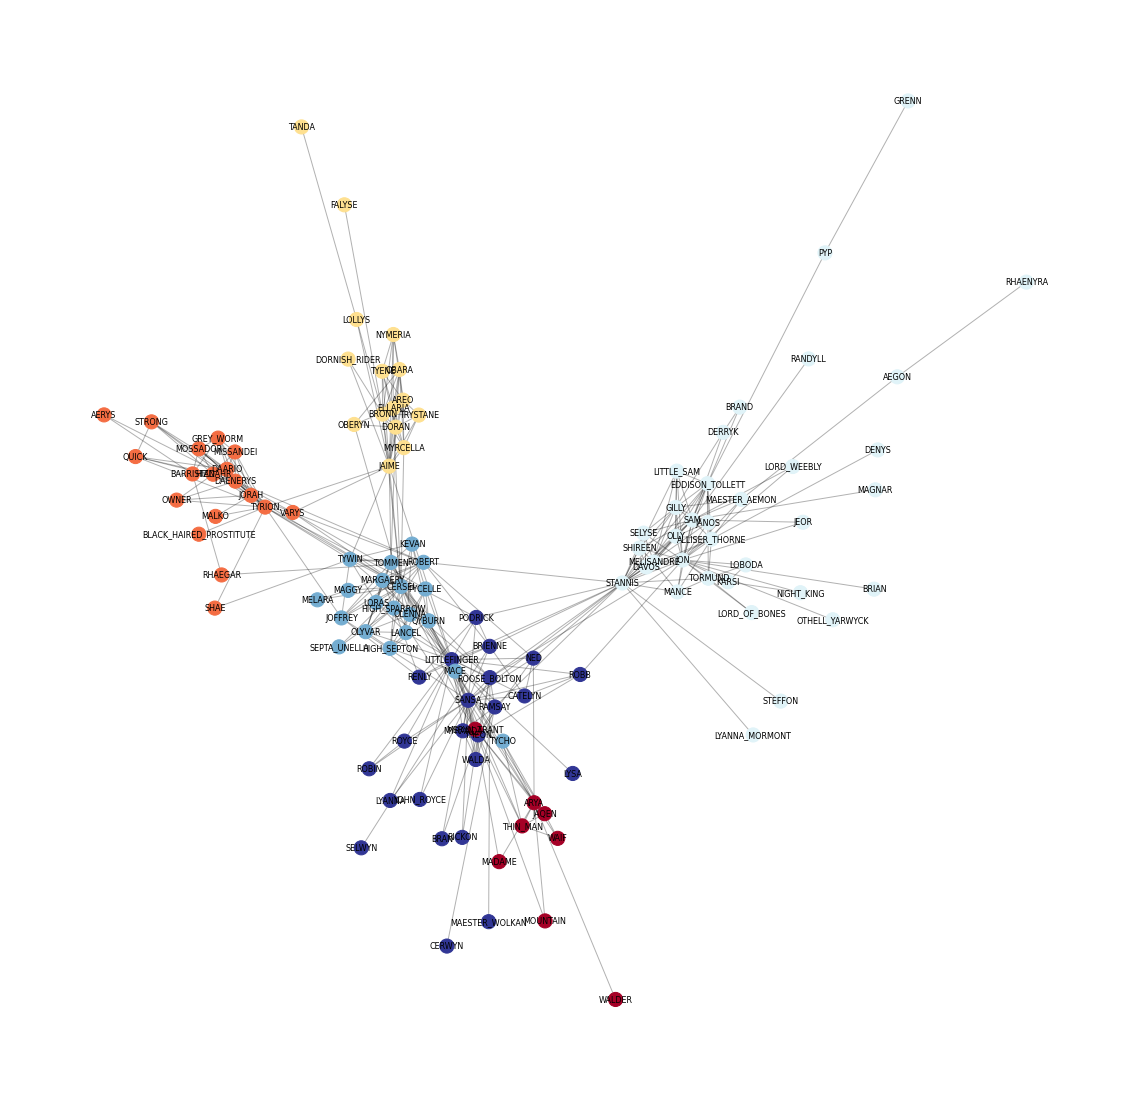

The communities detected are:
[('ARYA', 0), ('JAQEN', 0), ('WAIF', 0), ('MERYN_TRANT', 0), ('THIN_MAN', 0), ('MADAME', 0), ('MOUNTAIN', 0), ('WALDER', 0), ('JORAH', 1), ('TYRION', 1), ('VARYS', 1), ('DAENERYS', 1), ('DAARIO', 1), ('HIZDAHR', 1), ('BARRISTAN', 1), ('GREY_WORM', 1), ('MISSANDEI', 1), ('MOSSADOR', 1), ('BLACK_HAIRED_PROSTITUTE', 1), ('MALKO', 1), ('OWNER', 1), ('QUICK', 1), ('STRONG', 1), ('AERYS', 1), ('RHAEGAR', 1), ('SHAE', 1), ('BRONN', 2), ('JAIME', 2), ('MYRCELLA', 2), ('TYENE', 2), ('DORAN', 2), ('ELLARIA', 2), ('AREO', 2), ('TRYSTANE', 2), ('LOLLYS', 2), ('NYMERIA', 2), ('DORNISH_RIDER', 2), ('OBARA', 2), ('OBERYN', 2), ('FALYSE', 2), ('TANDA', 2), ('JON', 3), ('STANNIS', 3), ('SAM', 3), ('GILLY', 3), ('DAVOS', 3), ('TORMUND', 3), ('MELISANDRE', 3), ('SHIREEN', 3), ('OLLY', 3), ('MANCE', 3), ('ALLISER_THORNE', 3), ('KARSI', 3), ('JANOS', 3), ('SELYSE', 3), ('MAESTER_AEMON', 3), ('LOBODA', 3), ('EDDISON_TOLLETT', 3), ('LORD_OF_BONES', 3), ('BRAND', 3), ('DERRYK', 3

In [ ]:
import community.community_louvain as community_louvain
partition = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 200, cmap = plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_labels(G, pos, font_size = 8)
nx.draw_networkx_edges(G, pos, alpha = 0.3)
plt.show(G)

print("The communities detected are:")
print(sorted(partition.items(), key = lambda item:item[1]))

Page rank

In [17]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print(sorted(pgr.items(), key=itemgetter(1), reverse=True))


 sorted pagerank:

[('JON', 0.05527701804721431), ('CERSEI', 0.04907145383029075), ('STANNIS', 0.035588927800703385), ('SAM', 0.03345508554498901), ('SANSA', 0.0332416865078756), ('TYRION', 0.032758944911689125), ('DAENERYS', 0.028833610681882213), ('LITTLEFINGER', 0.027908935390820924), ('JAIME', 0.026550836547599124), ('ARYA', 0.023110504689969242), ('BRONN', 0.021905734670798246), ('RAMSAY', 0.020089402095363543), ('JAQEN', 0.017584211177069372), ('THEON', 0.016629368095856252), ('JORAH', 0.016209435227606005), ('HIGH_SPARROW', 0.015899326683008485), ('BRIENNE', 0.015831158276880433), ('DAVOS', 0.015547473917877284), ('MARGAERY', 0.015221057991509745), ('GILLY', 0.015021749406329488), ('DAARIO', 0.014161970513655284), ('TOMMEN', 0.01390086123497452), ('MELISANDRE', 0.012603327065069319), ('ROOSE_BOLTON', 0.012177690408496769), ('TORMUND', 0.012113974663855194), ('SHIREEN', 0.011892766165955434), ('OLLY', 0.01186284779631733), ('MYRCELLA', 0.011384169818615005), ('PODRICK', 0.010665

Clustering Coefficient

In [18]:
print(nx.transitivity(G))


0.4066552483484218


In [19]:
local_clustering = (nx.clustering(G))
local_clustering


{'AEGON': 0,
 'AERYS': 1.0,
 'ALLISER_THORNE': 0.5272727272727272,
 'AREO': 0.8055555555555556,
 'ARYA': 0.2727272727272727,
 'BARRISTAN': 0.47619047619047616,
 'BLACK_HAIRED_PROSTITUTE': 0,
 'BRAN': 1.0,
 'BRAND': 1.0,
 'BRIAN': 0,
 'BRIENNE': 0.39285714285714285,
 'BRONN': 0.3939393939393939,
 'CATELYN': 0.7,
 'CERSEI': 0.1724137931034483,
 'CERWYN': 0,
 'DAARIO': 0.6666666666666666,
 'DAENERYS': 0.4065934065934066,
 'DAVOS': 0.7777777777777778,
 'DENYS': 0,
 'DERRYK': 0.6666666666666666,
 'DORAN': 0.6,
 'DORNISH_RIDER': 1.0,
 'EDDISON_TOLLETT': 0.6,
 'ELLARIA': 0.6,
 'FALYSE': 0,
 'GILLY': 0.5606060606060606,
 'GRENN': 0,
 'GREY_WORM': 0.8095238095238095,
 'HIGH_SEPTON': 0.5714285714285714,
 'HIGH_SPARROW': 0.36363636363636365,
 'HIZDAHR': 0.6,
 'JAIME': 0.3235294117647059,
 'JANOS': 0.9523809523809523,
 'JAQEN': 0.8,
 'JEOR': 1.0,
 'JOFFREY': 0.39285714285714285,
 'JON': 0.22,
 'JORAH': 0.4909090909090909,
 'KARSI': 0.6666666666666666,
 'KEVAN': 0.5333333333333333,
 'LANCEL': 0.571

In [20]:
print(nx.average_clustering(G))


0.5744036387164706


Degree Centrality

In [21]:
from operator import itemgetter

In [22]:
degc = nx.degree_centrality(G)
# let's list the scores
dclist = sorted(degc.items(), key=itemgetter(1), reverse=True)
dclist


[('CERSEI', 0.2542372881355932),
 ('JON', 0.211864406779661),
 ('LITTLEFINGER', 0.211864406779661),
 ('STANNIS', 0.2033898305084746),
 ('SANSA', 0.17796610169491525),
 ('SAM', 0.1694915254237288),
 ('TYRION', 0.16101694915254236),
 ('JAIME', 0.1440677966101695),
 ('DAENERYS', 0.11864406779661017),
 ('BRONN', 0.1016949152542373),
 ('GILLY', 0.1016949152542373),
 ('TOMMEN', 0.1016949152542373),
 ('ROBERT', 0.1016949152542373),
 ('ARYA', 0.09322033898305085),
 ('JORAH', 0.09322033898305085),
 ('HIGH_SPARROW', 0.09322033898305085),
 ('ROOSE_BOLTON', 0.09322033898305085),
 ('ALLISER_THORNE', 0.09322033898305085),
 ('EDDISON_TOLLETT', 0.09322033898305085),
 ('DAARIO', 0.0847457627118644),
 ('THEON', 0.0847457627118644),
 ('HIZDAHR', 0.0847457627118644),
 ('MELISANDRE', 0.0847457627118644),
 ('OLLY', 0.0847457627118644),
 ('DORAN', 0.0847457627118644),
 ('ELLARIA', 0.0847457627118644),
 ('MACE', 0.0847457627118644),
 ('MERYN_TRANT', 0.0847457627118644),
 ('TYWIN', 0.0847457627118644),
 ('DAVO

Betweenness Centrality

In [23]:
bet = nx.betweenness_centrality(G)
# let's list the scores
bclist = sorted(bet.items(), key=itemgetter(1), reverse=True)
bclist


[('STANNIS', 0.323907053881389),
 ('CERSEI', 0.2670370382037797),
 ('LITTLEFINGER', 0.18920653479318086),
 ('JON', 0.15599253536610647),
 ('SANSA', 0.1299590521944892),
 ('TYRION', 0.12635168545615638),
 ('JAIME', 0.1209620496109667),
 ('ROOSE_BOLTON', 0.11774408375346056),
 ('ROBERT', 0.10416926329293577),
 ('SAM', 0.0740830366536581),
 ('ARYA', 0.07286330570691744),
 ('DAENERYS', 0.04830598175918911),
 ('PODRICK', 0.04418646771892079),
 ('EDDISON_TOLLETT', 0.03415578457951338),
 ('MAESTER_AEMON', 0.03364996585335568),
 ('MERYN_TRANT', 0.03298502305207791),
 ('BRONN', 0.0312753034507164),
 ('NED', 0.028389706826599796),
 ('TYWIN', 0.02627977835842308),
 ('JORAH', 0.023790598599562656),
 ('ALLISER_THORNE', 0.02328449955568599),
 ('MACE', 0.02204959661970702),
 ('BRIENNE', 0.021780379245870375),
 ('RAMSAY', 0.018894214861485466),
 ('LOLLYS', 0.01694915254237288),
 ('AEGON', 0.01694915254237288),
 ('PYP', 0.01694915254237288),
 ('TOMMEN', 0.0157852466041883),
 ('ROBB', 0.0143847102886650

Closeness Centrality

In [24]:
clos = nx.closeness_centrality(G)
# let's list the scores
cclist = sorted(clos.items(), key=itemgetter(1), reverse=True)
cclist


[('CERSEI', 0.4591439688715953),
 ('LITTLEFINGER', 0.4555984555984556),
 ('STANNIS', 0.4521072796934866),
 ('SANSA', 0.44528301886792454),
 ('ROOSE_BOLTON', 0.4354243542435424),
 ('ROBERT', 0.4244604316546763),
 ('PODRICK', 0.4068965517241379),
 ('JAIME', 0.40273037542662116),
 ('NED', 0.40273037542662116),
 ('TYWIN', 0.4),
 ('BRIENNE', 0.39730639730639733),
 ('TYRION', 0.3881578947368421),
 ('TOMMEN', 0.38436482084690554),
 ('JOFFREY', 0.38436482084690554),
 ('JON', 0.37942122186495175),
 ('VARYS', 0.3746031746031746),
 ('RAMSAY', 0.3746031746031746),
 ('ROBB', 0.3710691823899371),
 ('HIGH_SPARROW', 0.3653250773993808),
 ('LORAS', 0.36419753086419754),
 ('OLYVAR', 0.3630769230769231),
 ('LANCEL', 0.3597560975609756),
 ('OLENNA', 0.3586626139817629),
 ('MARGAERY', 0.3522388059701492),
 ('THEON', 0.3522388059701492),
 ('SAM', 0.34911242603550297),
 ('MAGGY', 0.34502923976608185),
 ('RENLY', 0.34502923976608185),
 ('CATELYN', 0.34402332361516036),
 ('MYRANDA', 0.3430232558139535),
 ('WAL

In [25]:
# Class to perform spectral clustering for k clusters, given k

class SpectralClustering:
    
    def __init__(self, G):
        # Initialize the graph, nodes and the normalized Laplacian

        self.graph = G
        self.normalized_laplacian = nx.linalg.normalized_laplacian_matrix(G).toarray()
        self.nodes = G.nodes()

    def compute_eigenspace(self):
        # Compute the eigenvalues and the eigenvectors using Numpy and sort them in ascending order 

        eigenvalues, eigenvectors = np.linalg.eig(self.normalized_laplacian)

        sort_index = np.argsort(eigenvalues) # Returns the list of indices that would sort the array
        sorted_eigenvectors = eigenvectors[:, sort_index]

        return sorted_eigenvectors

    def fit(self, k):
        """
        Step 1: Extract the k eigen vectors and stack them vertically to form a matrix (i.e each vector is a column)
        Step 2: Every row of this matrix represents the features of the respective nodes of the graph
        Step 3: Perform K-Means clustering on this dataset to identify k clusters

        """
        eigenvectors = self.compute_eigenspace()
        k_eigenvectors = np.array(eigenvectors)[:,:k]
        dataset = pd.DataFrame(k_eigenvectors, index=self.nodes)

        # print(dataset)

        k_means_clusters = KMeans(n_clusters = k, random_state=42)
        self.clusters = k_means_clusters.fit(k_eigenvectors)
        
    def predict_labels(self):
        # Returns the labels 
        return self.clusters.labels_

    def assign_labels(self, labels):
        # Helper to assign the labels as node attributes
        for i,node in enumerate(self.graph.nodes()):
            self.graph.nodes[node]['label'] = labels[i]

    def plot_graph(self, n_clusters, title='Graph after Spectral Clustering'):
        # Plots the graph 

        labels = self.clusters.labels_
        self.assign_labels(labels)

        colour_list = ['blue','green','red','yellow','cyan', 'magenta','lightblue','grey']
        sampled_colours = dict(zip(set(labels),random.sample(colour_list, n_clusters)))

        legend_handles = []
        for label, color in sampled_colours.items():
            colour_handle = mpatches.Patch(color=color, label=label)
            legend_handles.append(colour_handle)

        colours = [sampled_colours[i] for i in labels]

        pos_fr = nx.fruchterman_reingold_layout(self.graph)
        plt.figure(figsize=(8,8))
        plt.title(title)
        plt.legend(handles=legend_handles)
        nx.draw(self.graph, pos=pos_fr, node_size=500, node_color=colours, with_labels=True)
        plt.show()